In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from scipy.interpolate import make_interp_spline
df=pd.read_csv(r'Irish_DataSet\standardData2.txt',header=None,delimiter=" ")
df.rename(columns={0: "ID", 1: "Duration", 2: "Consumption"},inplace=True)

## considering only consumption column for DBSCAN

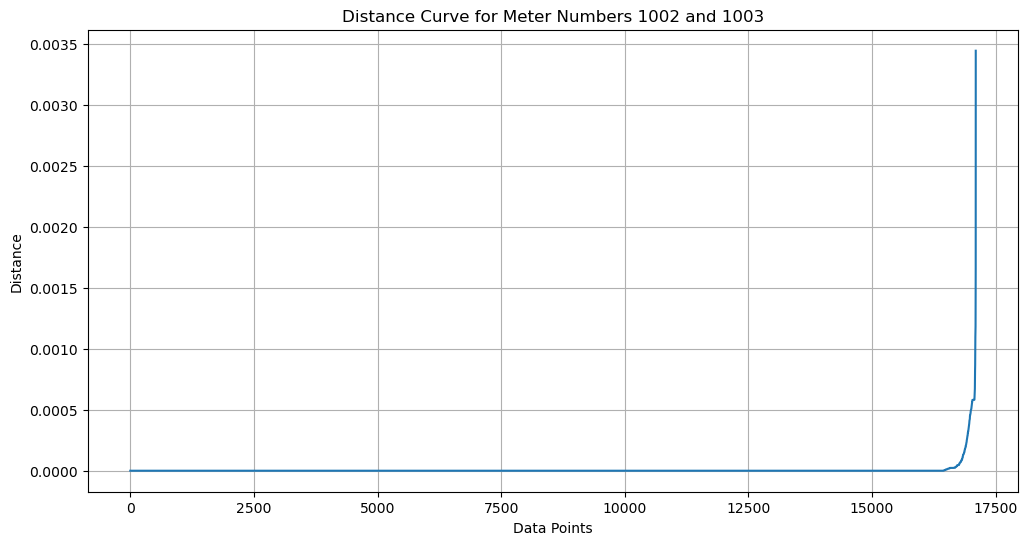

In [54]:
from sklearn.neighbors import NearestNeighbors

# Filter the data for meter numbers 1002 and 1003
meter_data = df[df['ID'].isin([1002, 1003])]

# Extract the consumption values as a NumPy array
consumption_data1 = meter_data['Consumption'].values.reshape(-1, 1)

# Calculate the distance matrix using NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(consumption_data1)
distances, indices = nbrs.kneighbors(consumption_data1)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot the distance curve
plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.title('Distance Curve for Meter Numbers 1002 and 1003')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8240\2105748882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meter_data['Cluster'] = dbscan.fit_predict(consumption_data1)


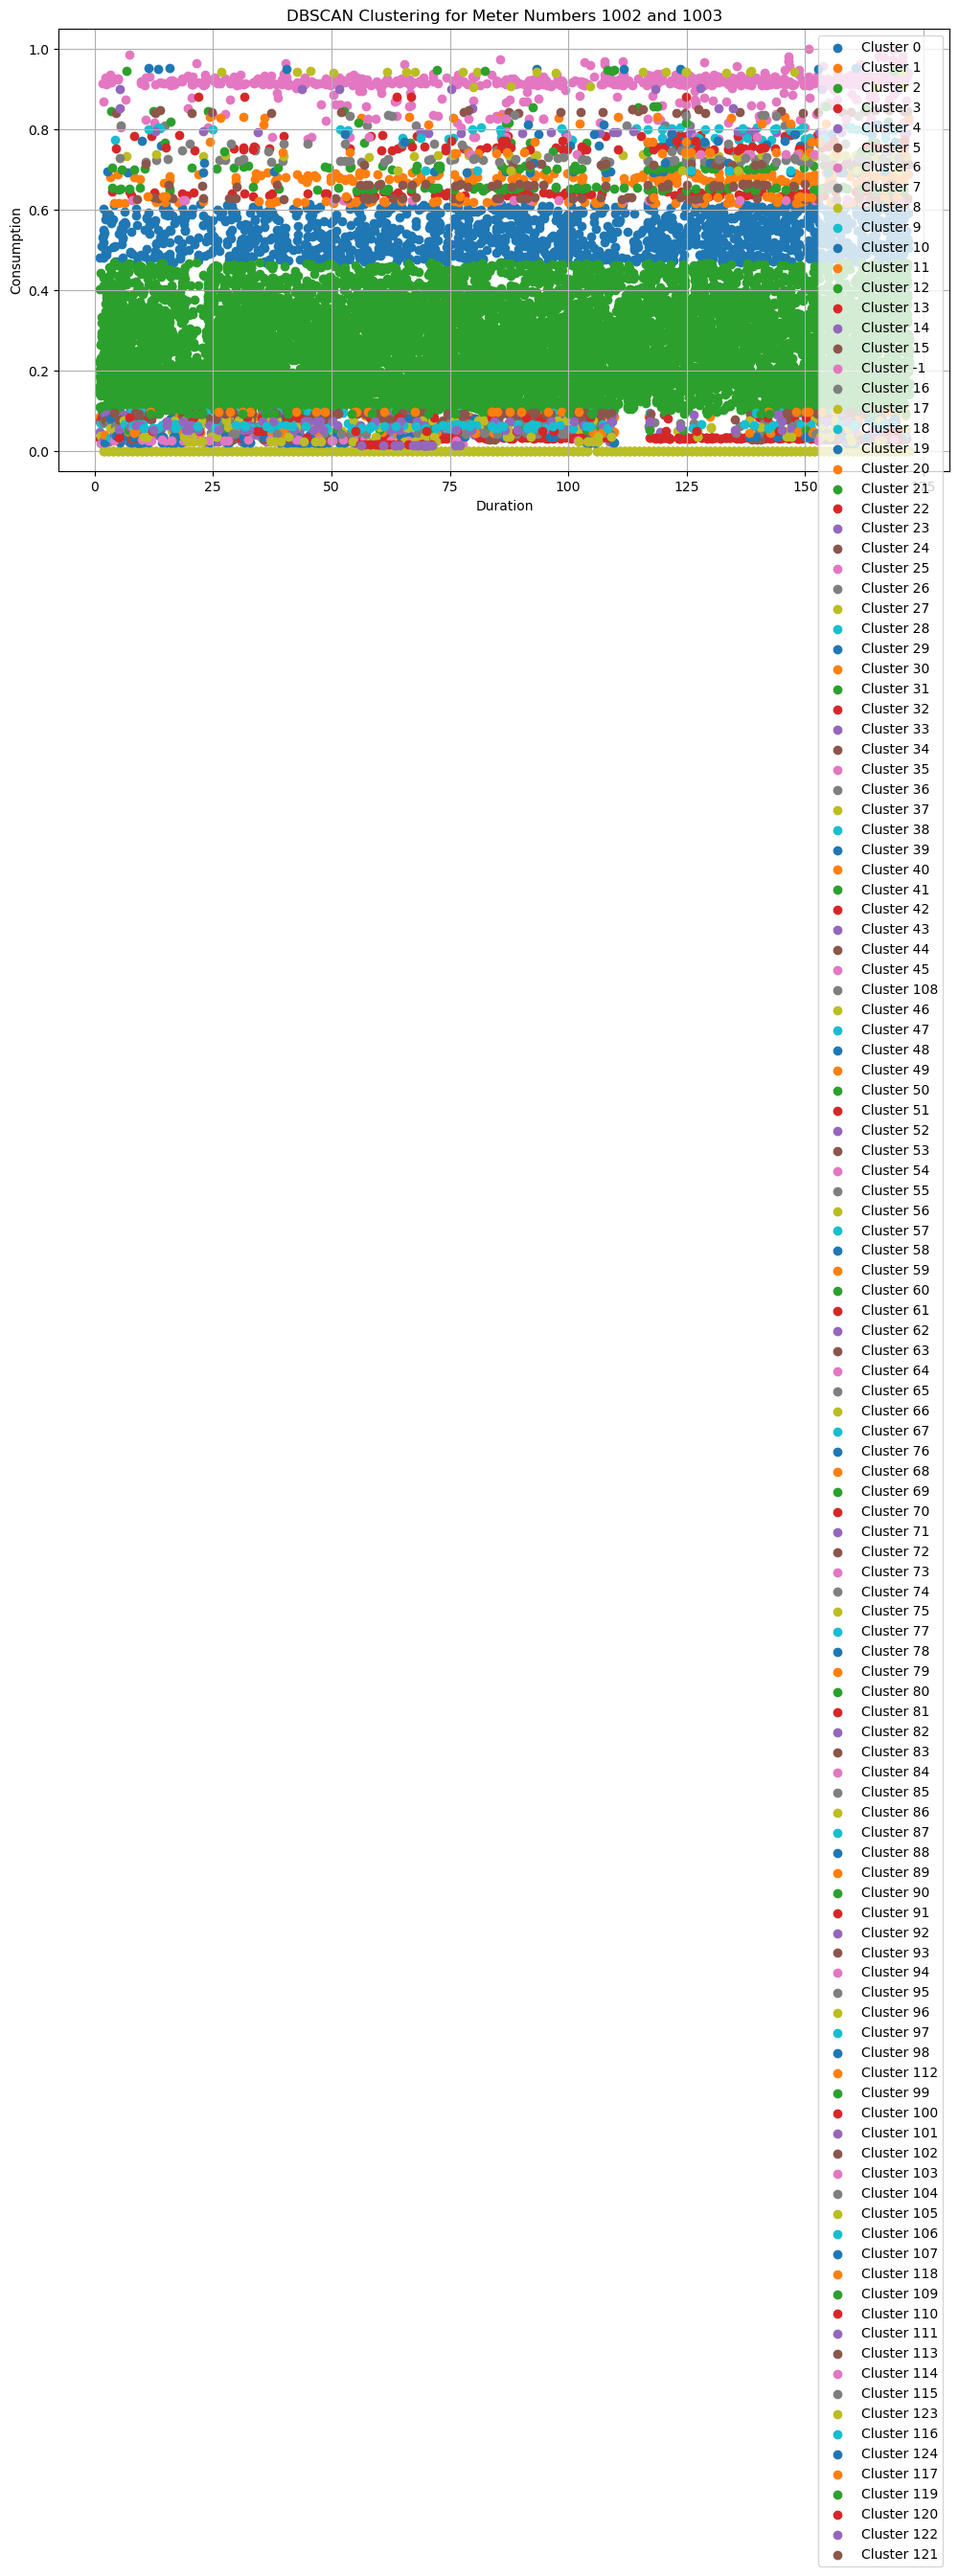

In [65]:
# Use DBSCAN to cluster the data based on the distance matrix
epsilon = 0.0009  # Adjust this value based on the distance curve
dbscan = DBSCAN(eps=epsilon, min_samples=5)
meter_data['Cluster'] = dbscan.fit_predict(consumption_data1)

# Visualize the clusters
plt.figure(figsize=(12, 6))
for cluster_label in meter_data['Cluster'].unique():
    cluster_points = meter_data[meter_data['Cluster'] == cluster_label]
    plt.scatter(cluster_points['Duration'], cluster_points['Consumption'], label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering for Meter Numbers 1002 and 1003')
plt.xlabel('Duration')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

## considering duration and consumption both for DBSCAN

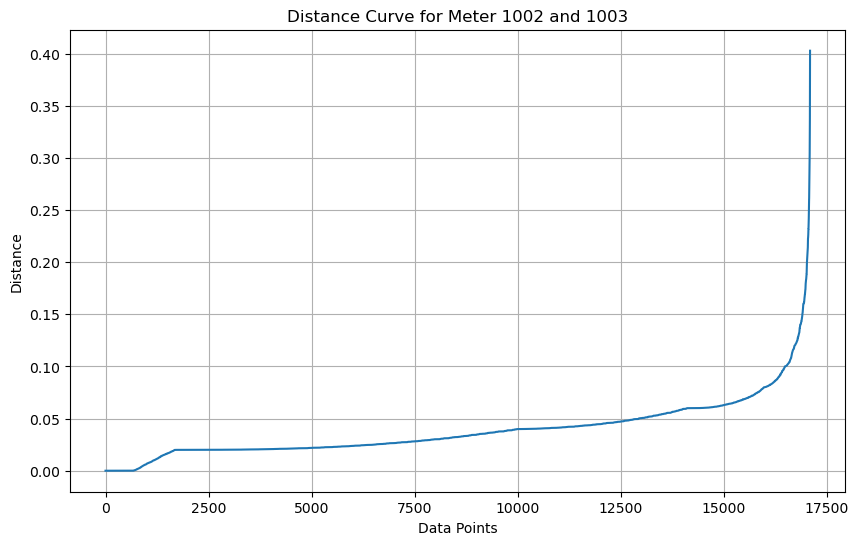

In [35]:
# Filter the data for meter numbers 1002 and 1003
meter_1002_1003_data = df[(df['ID'] == 1002) | (df['ID'] == 1003)]

# Select the columns for clustering
consumption_data2 = meter_1002_1003_data[['Duration', 'Consumption']]

# Calculate the distance matrix using NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(consumption_data2)
distances, indices = nbrs.kneighbors(consumption_data2)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot the distance curve
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Distance Curve for Meter 1002 and 1003')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8240\3663352157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meter_1002_1003_data['Cluster'] = dbscan.fit_predict(consumption_data2)


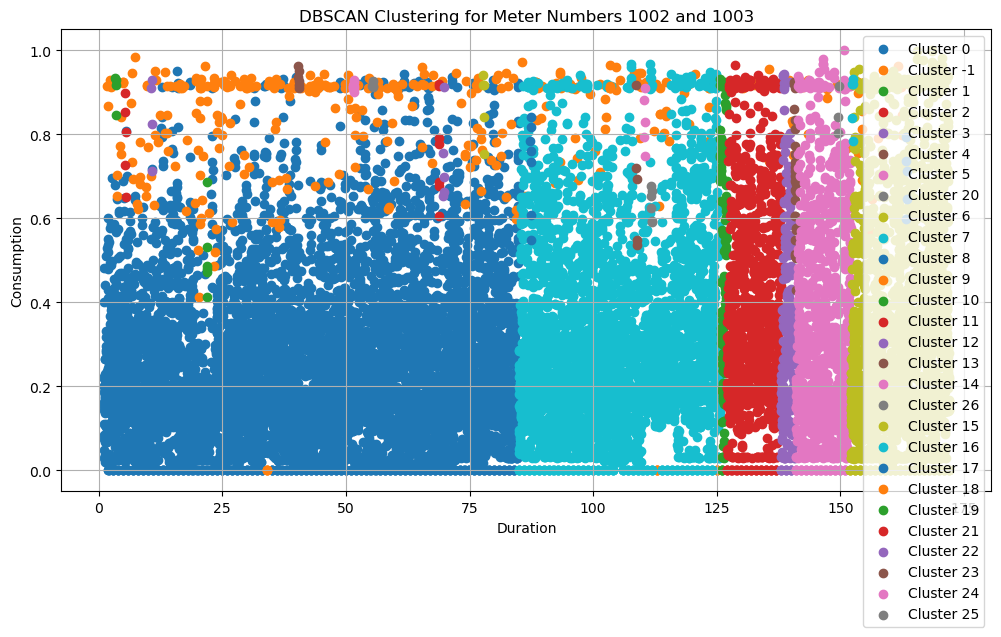

In [51]:
# Use DBSCAN to cluster the data based on the distance matrix
epsilon = 0.2 # Adjust this value based on the distance curve
dbscan = DBSCAN(eps=epsilon, min_samples=5)
meter_1002_1003_data['Cluster'] = dbscan.fit_predict(consumption_data2)

# Visualize the clusters
plt.figure(figsize=(12, 6))
for cluster_label in meter_1002_1003_data['Cluster'].unique():
    cluster_points = meter_1002_1003_data[meter_1002_1003_data['Cluster'] == cluster_label]
    plt.scatter(cluster_points['Duration'], cluster_points['Consumption'], label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering for Meter Numbers 1002 and 1003')
plt.xlabel('Duration')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

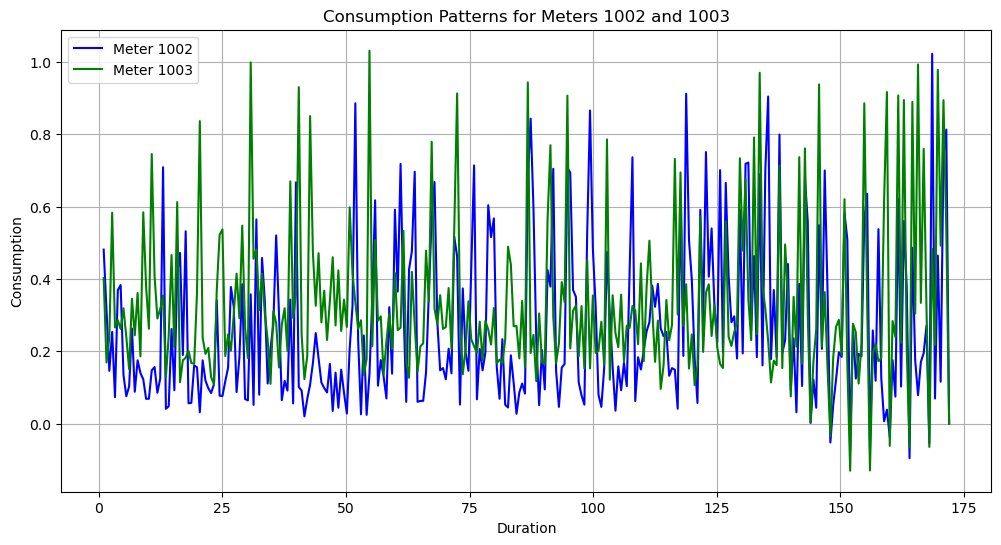

In [26]:
meter_1002_data = df[df['ID'] == 1002]
meter_1003_data = df[df['ID'] == 1003]

# Sort the data by 'Duration' for a smoother curve
meter_1002_data = meter_1002_data.sort_values(by='Duration')
meter_1003_data = meter_1003_data.sort_values(by='Duration')

# Interpolate the data for smoother curves
x1 = meter_1002_data['Duration']
y1 = meter_1002_data['Consumption']
x2 = meter_1003_data['Duration']
y2 = meter_1003_data['Consumption']

x_smooth1 = np.linspace(x1.min(), x1.max(), 300)  # Increase the number of points for smoother curve
y_smooth1 = make_interp_spline(x1, y1)(x_smooth1)
x_smooth2 = np.linspace(x2.min(), x2.max(), 300)  # Increase the number of points for smoother curve
y_smooth2 = make_interp_spline(x2, y2)(x_smooth2)

# Plot the consumption patterns of both meters in a single graph
plt.figure(figsize=(12, 6))
plt.plot(x_smooth1, y_smooth1, label='Meter 1002', linestyle='-', color='b')
plt.plot(x_smooth2, y_smooth2, label='Meter 1003', linestyle='-', color='g')
plt.title('Consumption Patterns for Meters 1002 and 1003')
plt.xlabel('Duration')
plt.ylabel('Consumption')
plt.grid(True)
plt.legend()
plt.show()

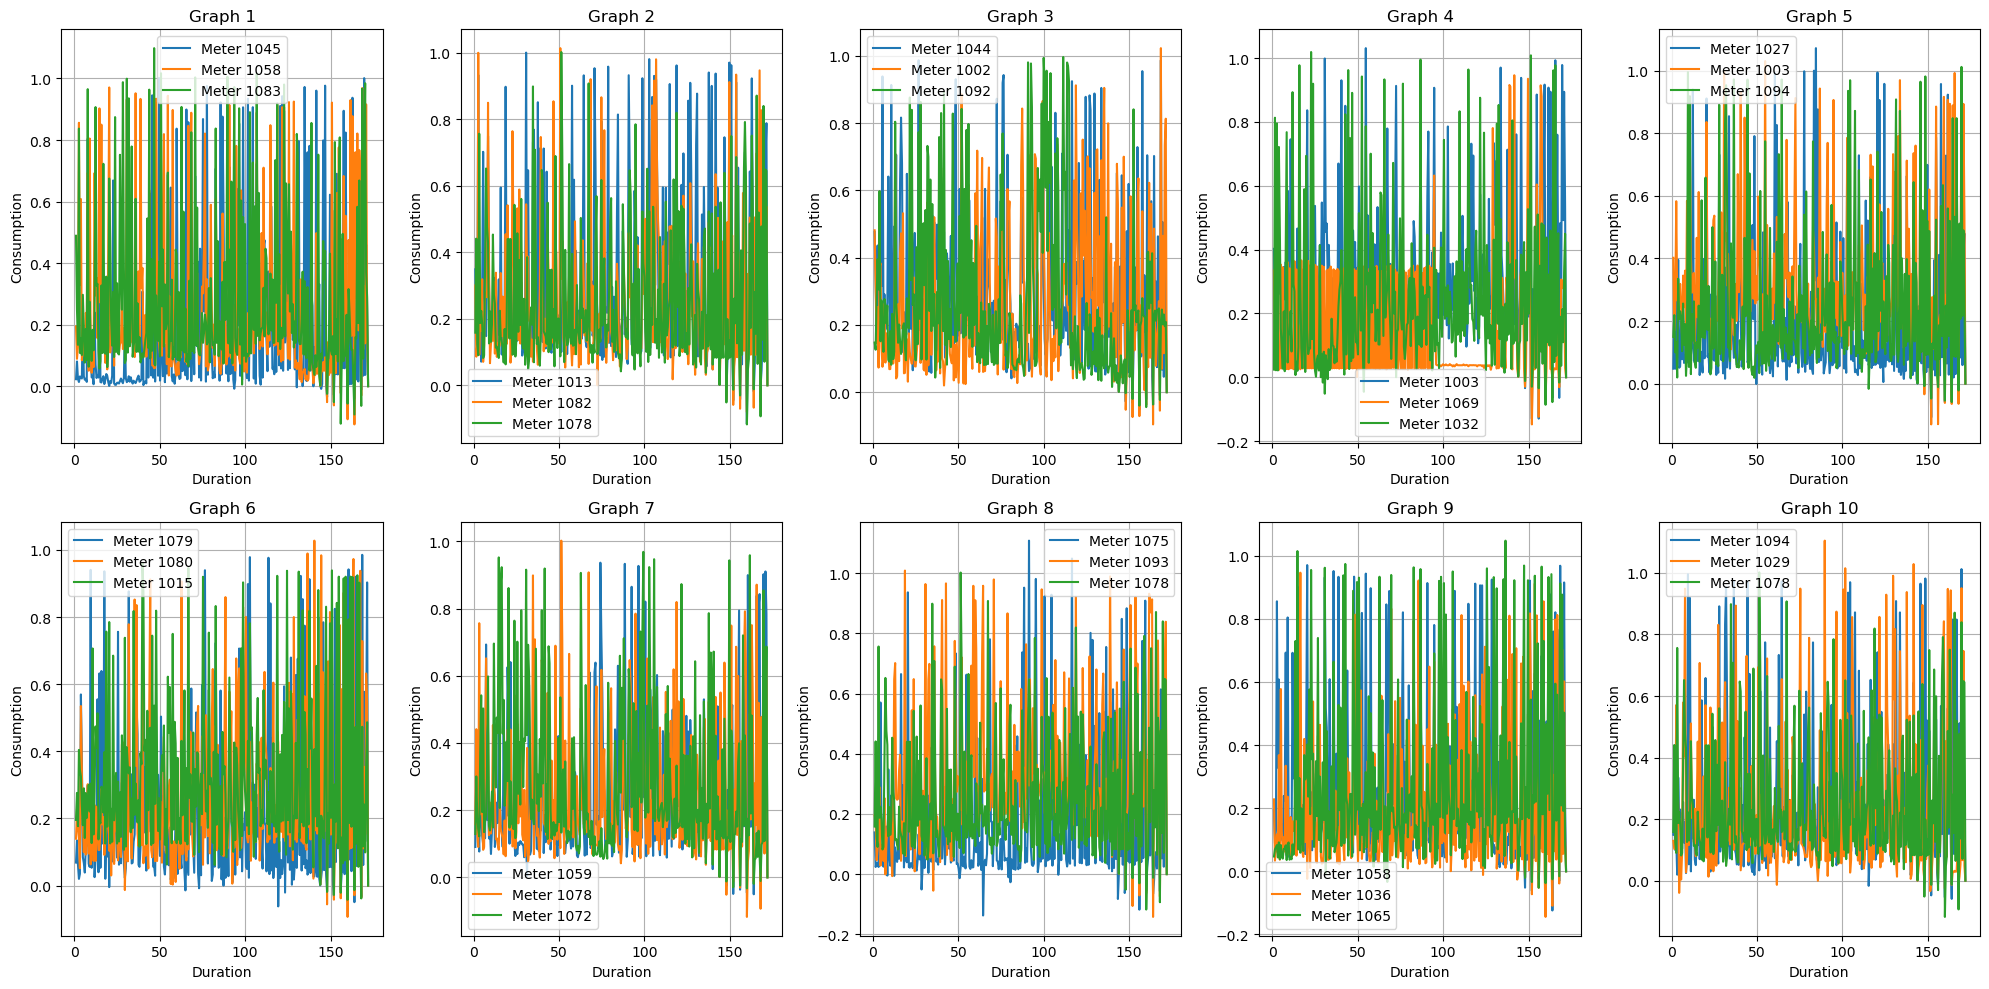

In [34]:
import random

meter_ids = df['ID'].unique()

# Create 10 random combinations of 3 meter IDs
random_meter_combinations = [random.sample(list(meter_ids), 3) for _ in range(10)]

# Create a 2x5 grid of subplots for the 10 graphs
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Iterate through the random meter combinations and plot them
for i, meter_combination in enumerate(random_meter_combinations):
    row = i // 5
    col = i % 5
    ax = axs[row, col]
    
    # Plot each meter's consumption pattern in the subplot
    for meter_id in meter_combination:
        meter_data = df[df['ID'] == meter_id]
        meter_data = meter_data.sort_values(by='Duration')
        x = meter_data['Duration']
        y = meter_data['Consumption']
        x_smooth = np.linspace(x.min(), x.max(), 300)
        y_smooth = make_interp_spline(x, y)(x_smooth)
        ax.plot(x_smooth, y_smooth, linestyle='-', label=f'Meter {meter_id}')
    
    ax.set_title(f'Graph {i + 1}')
    ax.set_xlabel('Duration')
    ax.set_ylabel('Consumption')
    ax.grid(True)
    ax.legend()

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


In [35]:
# df = df.iloc[:, [0,-1]]
# df= df.iloc[:8550]
# plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [94]:
clustering  = DBSCAN(eps = 0.2, min_samples = 2).fit(df)
clustering.labels_

In [96]:
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

In [107]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

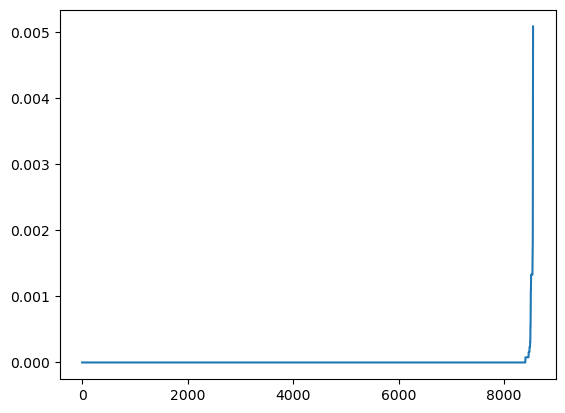

In [110]:
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.plot(distances)

In [174]:
dbscancluster = DBSCAN(eps = 0.005, min_samples = 5)
dbscancluster.fit(df)

DBSCAN(eps=0.005)

In [175]:
clusters =dbscancluster.labels_
len(set(clusters))

6

In [176]:
from sklearn.metrics import silhouette_score
silhouette_score(df, clusters)

-0.0671629859945711

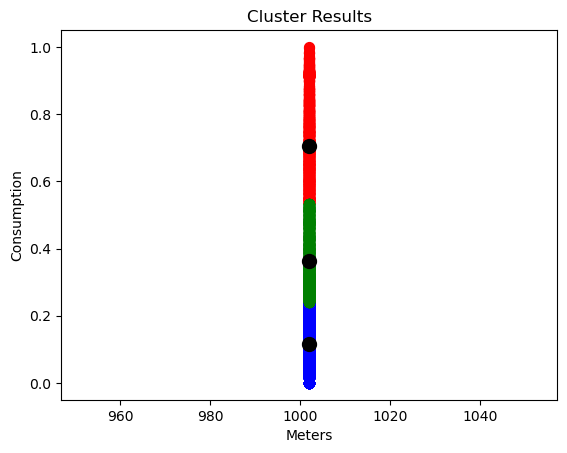

In [177]:
plt.scatter(df.iloc[labels==0,0], df.iloc[labels==0,1], s=50, c= "red")
plt.scatter(df.iloc[labels==1,0], df.iloc[labels==1,1], s=50, c= "blue")
plt.scatter(df.iloc[labels==2,0], df.iloc[labels==2,1], s=50, c= "green")
plt.scatter(df.iloc[labels==3,0], df.iloc[labels==3,1], s=50, c= "yellow")
# plt.scatter(df.iloc[labels==4,0], df.iloc[labels==4,1], s=50, c= "brown")
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100, c= "black")
plt.title("Cluster Results")
plt.xlabel("Meters")
plt.ylabel("Consumption")
plt.show()